In [6]:
# import os
# import json
# import random
# from sentence_transformers import SentenceTransformer
# from sklearn.decomposition import PCA
# from sklearn.cluster import KMeans
# from sklearn.feature_extraction.text import TfidfVectorizer
# import numpy as np
# import matplotlib.pyplot as plt
# from collections import Counter
# 
# # Disable TensorFlow if not needed
# os.environ["TRANSFORMERS_NO_TF"] = "1"
# 
# # Load data for clustering
# with open('extracted_events_4omini.json', 'r') as f:
#     data = json.load(f)
# 
# # Flatten nested lists of entries into a single list of dictionaries
# flattened_data = []
# for entry in data:
#     if isinstance(entry, list):
#         flattened_data.extend(entry)
#     elif isinstance(entry, dict):
#         flattened_data.append(entry)
# 
# print(f"Total flattened data entries: {len(flattened_data)}")
# 
# # Increase sample size to better capture variety in top-level clustering
# sample_size = min(len(flattened_data), 1000)
# sampled_data = random.sample(flattened_data, sample_size)
# print(f"Sampled data size: {len(sampled_data)}")
# 
# # Prepare clustering-focused data for the sampled entries
# texts_for_clustering = [
#     f"{entry.get('Phrase Summary', '')} {' '.join(entry.get('Keywords', []))}" for entry in sampled_data
# ]
# print(f"Number of texts prepared for clustering: {len(texts_for_clustering)}")
# 
# # Generate embeddings
# model = SentenceTransformer('all-MiniLM-L6-v2')
# embeddings = model.encode(texts_for_clustering)
# print(f"Generated embeddings shape: {embeddings.shape}")
# 
# # Option to skip PCA or adjust the number of components
# use_pca = True
# pca_components = 50  # Reduced components for broader clustering
# 
# if use_pca:
#     pca = PCA(n_components=pca_components)
#     reduced_embeddings = pca.fit_transform(embeddings)
#     print(f"Reduced embeddings shape: {reduced_embeddings.shape}")
# else:
#     reduced_embeddings = embeddings
#     print("PCA skipped; using original embedding dimensions.")
# 
# # Use KMeans to create approximately 10-15 broad top-level clusters
# print("Performing top-level clustering with KMeans to identify broad topics...")
# top_level_clustering_model = KMeans(n_clusters=10, random_state=0)  # Reduced cluster count
# top_level_labels = top_level_clustering_model.fit_predict(reduced_embeddings)
# print(f"Top-Level KMeans labels: {set(top_level_labels)}")
# 
# # Organize entries by top-level clusters
# top_level_clusters = {}
# for idx, label in enumerate(top_level_labels):
#     if label not in top_level_clusters:
#         top_level_clusters[label] = []
#     top_level_clusters[label].append(sampled_data[idx])
# 
# # Function to extract main themes using TF-IDF
# def extract_main_terms(cluster_data, num_terms=3):
#     phrase_summaries = [entry.get('Phrase Summary', '') for entry in cluster_data]
#     vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
#     X = vectorizer.fit_transform(phrase_summaries)
#     indices = np.argsort(np.asarray(X.sum(axis=0)).ravel())[::-1]
#     feature_names = vectorizer.get_feature_names_out()
#     main_terms = [feature_names[i] for i in indices[:num_terms]]
#     return " | ".join(main_terms)
# 
# # Generate names for top-level clusters based on extracted main terms
# top_level_cluster_names = {}
# for label, events in top_level_clusters.items():
#     top_level_cluster_names[label] = extract_main_terms(events)
# 
# # Display the names for broad clusters
# print("\nTop-Level Cluster Names:")
# for label, name in top_level_cluster_names.items():
#     print(f"Cluster {label}: {name}")
# 
# # Step 3: Sub-Clustering within Each Broad Cluster for More Granular Topics
# sub_clusters = {}
# sub_cluster_names = {}
# for label, events in top_level_clusters.items():
#     print(f"\nSub-clustering within top-level cluster {label} ({top_level_cluster_names[label]})...")
#     event_texts = [f"{event.get('Phrase Summary', '')} {' '.join(event.get('Keywords', []))}" for event in events]
#     event_embeddings = model.encode(event_texts)
#     reduced_event_embeddings = pca.transform(event_embeddings) if use_pca else event_embeddings
# 
#     # Apply HDBSCAN for sub-clustering
#     sub_clustering_model = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=1, metric='euclidean')
#     sub_labels = sub_clustering_model.fit_predict(reduced_event_embeddings)
#     sub_clusters[label] = {}
# 
#     for idx, sub_label in enumerate(sub_labels):
#         if sub_label == -1:
#             continue
#         if sub_label not in sub_clusters[label]:
#             sub_clusters[label][sub_label] = []
#         sub_clusters[label][sub_label].append(events[idx])
# 
#     # Generate names for sub-clusters based on main terms
#     sub_cluster_names[label] = {}
#     for sub_label, sub_events in sub_clusters[label].items():
#         sub_cluster_names[label][sub_label] = extract_main_terms(sub_events)
# 
# # Display sub-cluster names for each top-level cluster
# print("\nSub-Cluster Names within Each Top-Level Cluster:")
# for label, sub_dict in sub_cluster_names.items():
#     print(f"\nTop-Level Cluster {label} ({top_level_cluster_names[label]}):")
#     for sub_label, sub_name in sub_dict.items():
#         print(f"  Sub-Cluster {sub_label}: {sub_name}")


Total flattened data entries: 4460
Sampled data size: 1000
Number of texts prepared for clustering: 1000
Generated embeddings shape: (1000, 384)
Reduced embeddings shape: (1000, 50)
Performing top-level clustering with KMeans to identify broad topics...
Top-Level KMeans labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

Top-Level Cluster Names:
Cluster 8: life | value | importance
Cluster 2: announces | new | announced
Cluster 7: celebrated | celebrates | family
Cluster 0: expresses | gratitude | community
Cluster 6: youtube | internet | video
Cluster 1: critiques | expresses | advocates
Cluster 3: reflects | importance | art
Cluster 5: book | release | announces
Cluster 9: charity | 000 | raised
Cluster 4: health | cancer | healthcare

Sub-clustering within top-level cluster 8 (life | value | importance)...

Sub-clustering within top-level cluster 2 (announces | new | announced)...

Sub-clustering within top-level cluster 7 (celebrated | celebrates | family)...

Sub-clustering within top-level c

MOST UPDATED

Section 1

Total entries loaded: 4460
Generating embeddings...


Batches:   0%|          | 0/140 [00:00<?, ?it/s]

Reducing dimensionality with PCA...
Performing clustering...


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Number of clusters found: 158
Generating summaries for clusters...


Your max_length is set to 150, but your input_length is only 44. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=22)
Your max_length is set to 150, but your input_length is only 109. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=54)
Your max_length is set to 150, but your input_length is only 35. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)
Your max_length is set to 150, but your input_length is only 83. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=41)
You

Visualizing clusters...


/var/folders/71/mj1kpjjn7bxfpznnfwv95s0c0000gn/T/ipykernel_79920/2026350766.py:155: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


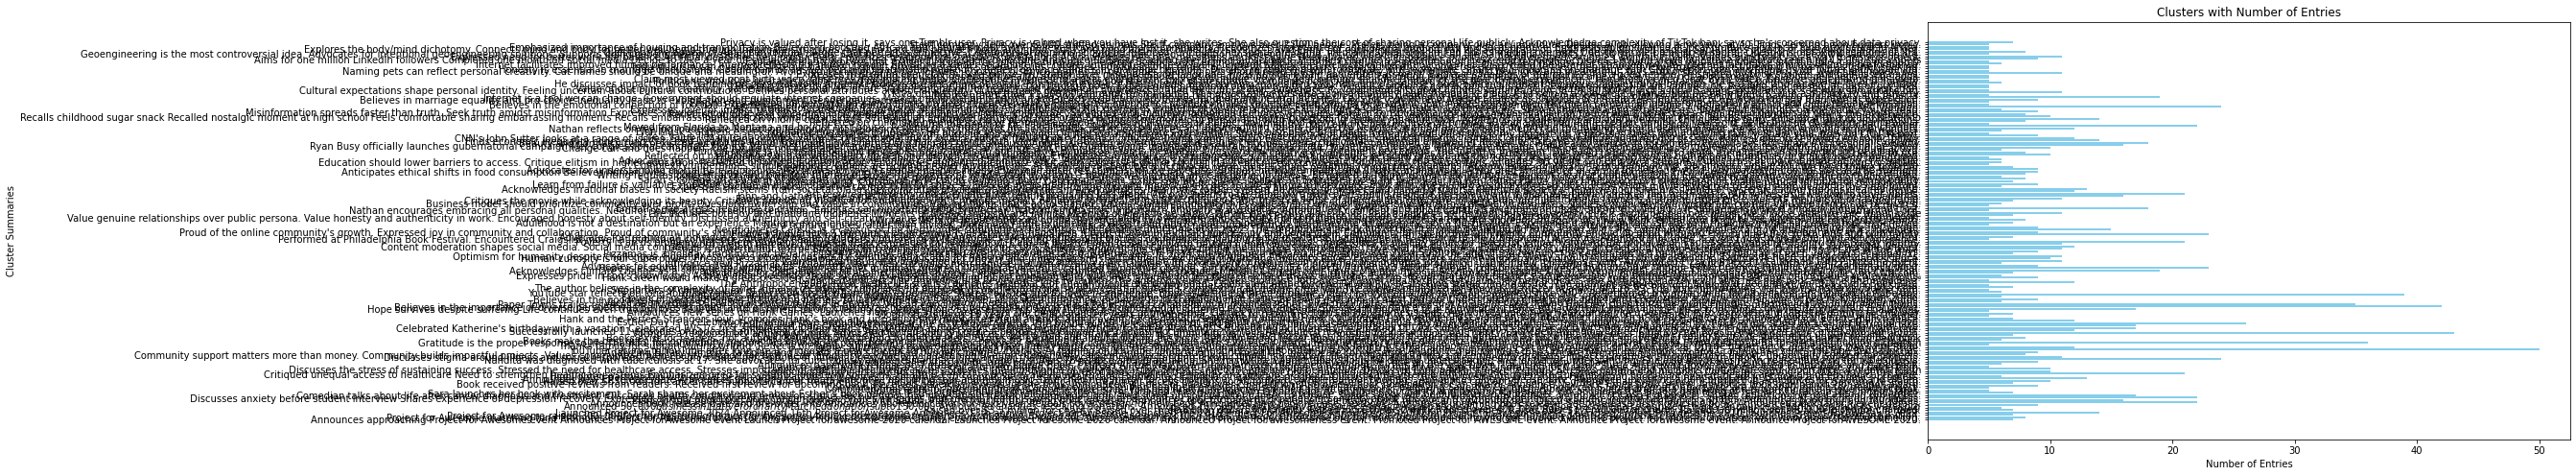


Structured Wiki Page Summary:

Cluster: Privacy is valued after losing it, says one Tumblr user. Privacy is valued when you have lost it, she writes. She also questions the cost of sharing personal life publicly. Acknowledledge complexity of TikTok ban, says she's concerned about data privacy.
Number of Entries: 7

Cluster: Steiff company sells over 5,000 stuffed animals Steiff company employs over 2,000 people. Prefers being a company over an individual. Desires a job allowing a mohawk at 40. Finds serving bison burgers ironic.
Number of Entries: 5

Cluster: Emphasized importance of housing and transportation Believes in boosting African agricultural productivity. Believes food is a complex commodity. Recognizes importance of agricultural productivity and local produce. Emphasised importance of local produce and local food production in Africa.
Number of Entries: 5

Cluster: Explores the body/mind dichotomy. Connects mind and body for better well-being through inanimate structures. S

In [61]:
# import os
# import json
# import torch
# import numpy as np
# import matplotlib.pyplot as plt
# import spacy
# import hdbscan
# from scipy.spatial.distance import pdist, squareform
# from sentence_transformers import SentenceTransformer
# from sklearn.decomposition import PCA
# from transformers import pipeline
# 
# # Load the spaCy English model
# nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
# 
# def preprocess_text(text):
#     # Process the text with spaCy
#     doc = nlp(text)
#     # Extract lemmatized tokens, removing stopwords and non-alphabetic tokens
#     words = [token.lemma_.lower() for token in doc if token.is_alpha and not token.is_stop]
#     return ' '.join(words)
# 
# def get_representative_texts(texts, tokenizer, max_tokens=512):
#     combined_text = ' '.join(texts)
#     # Encode the combined text with truncation
#     inputs = tokenizer(
#         combined_text,
#         max_length=max_tokens,
#         truncation=True,
#         return_tensors=None,
#         add_special_tokens=True
#     )
#     input_ids = inputs['input_ids']
#     # Decode back to text
#     truncated_text = tokenizer.decode(input_ids, skip_special_tokens=True)
#     return truncated_text
# 
# # Configure GPU usage if available
# device = "cuda" if torch.cuda.is_available() else "cpu"
# 
# # Load models
# embedding_model = SentenceTransformer('all-mpnet-base-v2', device=device)
# 
# # Load the summarization model
# summarizer = pipeline(
#     "summarization",
#     model="facebook/bart-large-cnn",
#     tokenizer="facebook/bart-large-cnn",
#     device=0 if device == "cuda" else -1
# )
# 
# # Get the tokenizer from the summarizer
# tokenizer = summarizer.tokenizer
# 
# # Load data containing 'Phrase Summary' entries
# with open('extracted_events_4omini.json', 'r') as f:
#     data = json.load(f)
# 
# # Flatten the nested list
# def flatten(data):
#     flat_list = []
#     for item in data:
#         if isinstance(item, list):
#             flat_list.extend(flatten(item))
#         else:
#             flat_list.append(item)
#     return flat_list
# 
# data = flatten(data)
# 
# texts_for_clustering = []
# entries_for_clustering = []
# 
# for entry in data:
#     if isinstance(entry, dict):
#         phrase_summary = entry.get('Phrase Summary', '')
#         if phrase_summary:
#             preprocessed_text = preprocess_text(phrase_summary)
#             texts_for_clustering.append(preprocessed_text)
#             entries_for_clustering.append(entry)
#     else:
#         print(f"Skipping non-dictionary entry: {entry}")
# 
# print(f"Total entries loaded: {len(entries_for_clustering)}")
# 
# # Generate embeddings for "Phrase Summary" entries
# print("Generating embeddings...")
# embeddings = embedding_model.encode(texts_for_clustering, show_progress_bar=True)
# 
# # Dimensionality reduction with PCA
# print("Reducing dimensionality with PCA...")
# pca = PCA(n_components=50)
# reduced_embeddings = pca.fit_transform(embeddings)
# 
# # Compute pairwise cosine distances
# distance_matrix = squareform(pdist(reduced_embeddings, metric='cosine'))
# 
# # Perform clustering with precomputed distances
# print("Performing clustering...")
# clusterer = hdbscan.HDBSCAN(
#     min_cluster_size=5,
#     min_samples=1,
#     metric='precomputed',
#     cluster_selection_method='eom'
# )
# labels = clusterer.fit_predict(distance_matrix)
# 
# # Print the number of clusters found
# num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
# print(f"Number of clusters found: {num_clusters}")
# 
# # Organize entries by cluster labels
# clusters = {}
# for idx, label in enumerate(labels):
#     if label == -1:
#         continue  # Skip noise
#     if label not in clusters:
#         clusters[label] = []
#     clusters[label].append(entries_for_clustering[idx])
# 
# # Generate summaries for clusters
# print("Generating summaries for clusters...")
# cluster_summaries = {}
# for label, entries in clusters.items():
#     texts = [entry.get('Phrase Summary', '') for entry in entries]
#     representative_text = get_representative_texts(texts, tokenizer, max_tokens=1024)
#     if not representative_text.strip():
#         print(f"Skipping empty representative text for cluster {label}.")
#         summary = "Summary not available (empty input)."
#     else:
#         try:
#             summary = summarizer(
#                 representative_text,
#                 max_length=150,
#                 min_length=50,
#                 do_sample=False,
#                 truncation=True
#             )[0]['summary_text']
#         except Exception as e:
#             print(f"Error summarizing cluster {label}: {e}")
#             summary = "Summary not available."
#     cluster_summaries[label] = summary
# 
# # Visualize clusters
# print("Visualizing clusters...")
# cluster_names = [cluster_summaries[label] for label in sorted(cluster_summaries)]
# cluster_sizes = [len(clusters[label]) for label in sorted(clusters)]
# 
# plt.figure(figsize=(12, 8))
# plt.barh(cluster_names, cluster_sizes, color='skyblue')
# plt.xlabel("Number of Entries")
# plt.ylabel("Cluster Summaries")
# plt.title("Clusters with Number of Entries")
# plt.gca().invert_yaxis()
# plt.tight_layout()
# plt.show()
# 
# # Print structured summaries
# print("\nStructured Wiki Page Summary:")
# for label in sorted(cluster_summaries):
#     theme = cluster_summaries[label]
#     print(f"\nCluster: {theme}")
#     print(f"Number of Entries: {len(clusters[label])}")


CLUSTERING ATTEMPT 3

In [5]:
!pip install numpy hdbscan sentence-transformers umap-learn transformers
import json
import torch
import numpy as np
import matplotlib.pyplot as plt
import spacy
import hdbscan
from scipy.spatial.distance import pdist, squareform

from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
from transformers import pipeline

# Load the spaCy English model
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def preprocess_text(text):
    # Process the text with spaCy
    doc = nlp(text)
    # Extract lemmatized tokens, removing stopwords and non-alphabetic tokens
    words = [token.lemma_.lower() for token in doc if token.is_alpha and not token.is_stop]
    return ' '.join(words)

def get_representative_texts(texts, tokenizer, max_tokens=512):
    combined_text = ' '.join(texts)
    # Encode the combined text with truncation
    inputs = tokenizer(
        combined_text,
        max_length=max_tokens,
        truncation=True,
        return_tensors=None,
        add_special_tokens=True
    )
    input_ids = inputs['input_ids']
    # Decode back to text
    truncated_text = tokenizer.decode(input_ids, skip_special_tokens=True)
    return truncated_text

# Configure GPU usage if available
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load models
embedding_model = SentenceTransformer('all-mpnet-base-v2', device=device)

# Load the summarization model
summarizer = pipeline(
    "summarization",
    model="facebook/bart-large-cnn",
    tokenizer="facebook/bart-large-cnn",
    device=0 if device == "cuda" else -1
)

# Get the tokenizer from the summarizer
tokenizer = summarizer.tokenizer

# Load data containing 'Phrase Summary' entries
with open('extracted_events_4omini.json', 'r') as f:
    data = json.load(f)

# Flatten the nested list
def flatten(data):
    flat_list = []
    for item in data:
        if isinstance(item, list):
            flat_list.extend(flatten(item))
        else:
            flat_list.append(item)
    return flat_list

# data = flatten(data)
# Take a subset of the data for faster testing (first 100 entries)
data = flatten(data)[:100]


texts_for_clustering = []
entries_for_clustering = []

for entry in data:
    if isinstance(entry, dict):
        phrase_summary = entry.get('Phrase Summary', '')
        if phrase_summary:
            preprocessed_text = preprocess_text(phrase_summary)
            texts_for_clustering.append(preprocessed_text)
            entries_for_clustering.append(entry)
    else:
        print(f"Skipping non-dictionary entry: {entry}")

print(f"Total entries loaded: {len(entries_for_clustering)}")

# Generate embeddings for "Phrase Summary" entries
print("Generating embeddings...")
embeddings = embedding_model.encode(texts_for_clustering, show_progress_bar=True)

use_pca = True

if use_pca:
    # Dimensionality reduction with PCA
    print("Reducing dimensionality with PCA...")
    pca = PCA(n_components=50)
    reduced_embeddings = pca.fit_transform(embeddings)
else:
    reduced_embeddings = embeddings

# Perform clustering with HDBSCAN
print("Performing clustering...")
# Compute pairwise cosine distances
distance_matrix = squareform(pdist(reduced_embeddings, metric='cosine'))

# Perform clustering with precomputed distances
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=5,
    min_samples=1,
    metric='precomputed',
    cluster_selection_method='eom'
)
labels = clusterer.fit_predict(distance_matrix)

# Print the number of clusters found
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Number of clusters found: {num_clusters}")

# Organize entries by cluster labels
clusters = {}
for idx, label in enumerate(labels):
    if label == -1:
        continue  # Skip noise
    if label not in clusters:
        clusters[label] = []
    clusters[label].append(entries_for_clustering[idx])

# Generate summaries for clusters
print("Generating summaries for clusters...")
cluster_summaries = {}
for label, entries in clusters.items():
    texts = [entry.get('Phrase Summary', '') for entry in entries]
    representative_text = get_representative_texts(texts, tokenizer, max_tokens=1024)

    if not representative_text.strip():
        print(f"Skipping empty representative text for cluster {label}.")
        summary = "Summary not available (empty input)."
    else:
        input_length = len(tokenizer(representative_text)['input_ids'])  # Calculate input length
        # Dynamically adjust max_length and min_length
        max_length = min(150, max(20, int(input_length * 0.5)))  # Set max_length to 50% of input length
        min_length = min(50, max(10, int(max_length * 0.5)))  # Set min_length to 50% of max_length

        try:
            summary = summarizer(
                representative_text,
                max_length=max_length,
                min_length=min_length,
                do_sample=False,
                truncation=True
            )[0]['summary_text']
        except Exception as e:
            print(f"Error summarizing cluster {label}: {e}")
            summary = "Summary not available."
    cluster_summaries[label] = summary

# Visualize top-level clusters with sub-cluster counts
print("Visualizing clusters...")
cluster_names = [cluster_summaries[label] for label in sorted(cluster_summaries)]

# Count number of entries in each cluster
cluster_sizes = [len(clusters[label]) for label in sorted(clusters)]

plt.figure(figsize=(12, 8))
plt.barh(cluster_names, cluster_sizes, color='skyblue')
plt.xlabel("Number of Entries in Clusters")
plt.ylabel("Cluster Topics")
plt.title("Cluster Sizes and Topics")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


# Print a structured summary for overarching themes and sub-clusters
print("\nStructured Summary with Overarching Themes and Sub-Cluster Topics:")
for top_label in sorted(cluster_summaries):
    # Overarching cluster theme (shortened to a single sentence or phrase)
    theme = cluster_summaries[top_label].split(".")[0].strip()  # Take only the first sentence or phrase
    print(f"\nOverarching Cluster Theme: {theme}")
    print(f"Number of entries in cluster: {len(clusters[top_label])}")

    # Sub-cluster analysis
    sub_clusters = {}
    sub_cluster_embeddings = reduced_embeddings[
        [idx for idx, lbl in enumerate(labels) if lbl == top_label]
    ]

    # Perform sub-clustering with HDBSCAN
    sub_clusterer = hdbscan.HDBSCAN(
        min_cluster_size=3,
        min_samples=1,
        metric='euclidean'
    )
    sub_labels = sub_clusterer.fit_predict(sub_cluster_embeddings)

    # Organize entries by sub-cluster labels
    for idx, sub_label in enumerate(sub_labels):
        if sub_label not in sub_clusters:
            sub_clusters[sub_label] = []
        sub_clusters[sub_label].append(clusters[top_label][idx])

    # Sub-cluster topics
    print("Sub-Cluster Topics:")
    for sub_label, sub_entries in sub_clusters.items():
        sub_texts = [entry.get('Phrase Summary', '') for entry in sub_entries]
        representative_text = get_representative_texts(sub_texts, tokenizer, max_tokens=512)
        if not representative_text.strip():
            print(f"  Sub-Cluster {sub_label}: No topics available (empty).")
        else:
            # Generate a concise topic for each sub-cluster
            try:
                sub_topic = summarizer(
                    representative_text,
                    max_length=30,
                    min_length=10,
                    do_sample=False
                )[0]['summary_text']
                print(f"  Sub-Cluster {sub_label}: {sub_topic}")
            except Exception as e:
                print(f"  Sub-Cluster {sub_label}: Error summarizing: {e}")



huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Total entries loaded: 100
Generating embeddings...


Batches:   0%|          | 0/4 [00:00<?, ?it/s]

RuntimeError: Numpy is not available

In [6]:
import os
import json
import torch
import numpy as np
import matplotlib.pyplot as plt
import spacy
import hdbscan
from scipy.spatial.distance import pdist, squareform

from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
from transformers import pipeline

# Load the spaCy English model
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def preprocess_text(text):
    # Process the text with spaCy
    doc = nlp(text)
    # Extract lemmatized tokens, removing stopwords and non-alphabetic tokens
    words = [token.lemma_.lower() for token in doc if token.is_alpha and not token.is_stop]
    return ' '.join(words)

# Configure GPU usage if available
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load models
embedding_model = SentenceTransformer('all-mpnet-base-v2', device=device)

# Load the summarization model
summarizer = pipeline(
    "summarization",
    model="facebook/bart-large-cnn",
    tokenizer="facebook/bart-large-cnn",
    device=0 if device == "cuda" else -1
)

# Load data
with open('extracted_events_4omini.json', 'r') as f:
    data = json.load(f)

# Flatten the nested list
def flatten(data):
    flat_list = []
    for item in data:
        if isinstance(item, list):
            flat_list.extend(flatten(item))
        else:
            flat_list.append(item)
    return flat_list

# Take a subset of the data for faster testing (first 100 entries)
data = flatten(data)[:100]

texts_for_clustering = []
entries_for_clustering = []

for entry in data:
    if isinstance(entry, dict):
        phrase_summary = entry.get('Phrase Summary', '')
        if phrase_summary:
            preprocessed_text = preprocess_text(phrase_summary)
            texts_for_clustering.append(preprocessed_text)
            entries_for_clustering.append(entry)
    else:
        print(f"Skipping non-dictionary entry: {entry}")

print(f"Total entries loaded: {len(entries_for_clustering)}")

# Generate embeddings for "Phrase Summary" entries
print("Generating embeddings...")
embeddings = embedding_model.encode(texts_for_clustering, show_progress_bar=True)

# Dimensionality reduction with PCA
use_pca = True
if use_pca:
    print("Reducing dimensionality with PCA...")
    pca = PCA(n_components=50)
    reduced_embeddings = pca.fit_transform(embeddings)
else:
    reduced_embeddings = embeddings

# Perform clustering with HDBSCAN
print("Performing clustering...")
distance_matrix = squareform(pdist(reduced_embeddings, metric='cosine'))
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=5,
    min_samples=1,
    metric='precomputed',
    cluster_selection_method='eom'
)
labels = clusterer.fit_predict(distance_matrix)

# Organize data by clusters
clusters = {}
for idx, label in enumerate(labels):
    if label == -1:
        continue  # Skip noise
    if label not in clusters:
        clusters[label] = []
    clusters[label].append(entries_for_clustering[idx])

# Generate summaries and maintain references
print("Generating overarching cluster themes...")
cluster_data = {}
for label, entries in clusters.items():
    # Combine texts and extract references for the cluster
    cluster_texts = [entry.get('Phrase Summary', '') for entry in entries]
    cluster_references = [{'Date': entry.get('Date'), 'Transcript': entry.get('Transcript Line')} for entry in entries]
    representative_text = ' '.join(cluster_texts)

    # Generate cluster theme
    try:
        cluster_theme = summarizer(
            representative_text,
            max_length=50,
            min_length=10,
            do_sample=False
        )[0]['summary_text']
    except Exception as e:
        cluster_theme = "Theme not available"

    # Store cluster information
    cluster_data[label] = {
        "Theme": cluster_theme,
        "Entries": entries,
        "References": cluster_references
    }

# Sub-cluster analysis
print("Performing sub-clustering within clusters...")
for label, cluster_info in cluster_data.items():
    cluster_embeddings = reduced_embeddings[
        [idx for idx, lbl in enumerate(labels) if lbl == label]
    ]
    sub_clusterer = hdbscan.HDBSCAN(
        min_cluster_size=3,
        min_samples=1,
        metric='euclidean'
    )
    sub_labels = sub_clusterer.fit_predict(cluster_embeddings)

    # Organize sub-cluster information
    sub_clusters = {}
    for sub_idx, sub_label in enumerate(sub_labels):
        if sub_label == -1:
            continue
        if sub_label not in sub_clusters:
            sub_clusters[sub_label] = []
        sub_clusters[sub_label].append(cluster_info["Entries"][sub_idx])

    # Summarize sub-clusters
    sub_cluster_summaries = {}
    for sub_label, sub_entries in sub_clusters.items():
        sub_texts = [entry.get('Phrase Summary', '') for entry in sub_entries]
        try:
            sub_summary = summarizer(
                ' '.join(sub_texts),
                max_length=30,
                min_length=10,
                do_sample=False
            )[0]['summary_text']
        except Exception as e:
            sub_summary = "Summary not available"
        sub_cluster_summaries[sub_label] = sub_summary

    # Add sub-cluster information to the cluster data
    cluster_data[label]["Sub-Clusters"] = {
        "Topics": sub_cluster_summaries,
        "Details": sub_clusters
    }

# Display structured output
print("\nStructured Output:")
for label, cluster_info in cluster_data.items():
    print(f"\nCluster {label}: {cluster_info['Theme']}")
    print(f"Number of Entries: {len(cluster_info['Entries'])}")
    print("References:")
    for ref in cluster_info["References"]:
        print(f"  - Date: {ref['Date']}, Transcript: {ref['Transcript']}")
    print("Sub-Cluster Topics:")
    for sub_label, sub_summary in cluster_info["Sub-Clusters"]["Topics"].items():
        print(f"  Sub-Cluster {sub_label}: {sub_summary}")


Total entries loaded: 100
Generating embeddings...


Batches:   0%|          | 0/4 [00:00<?, ?it/s]

RuntimeError: Numpy is not available